In [ ]:
# Importing necessary libraries
import pandas as pd
import csv
from google.colab import files
import re
import nltk
nltk.download('stopwords')
nltk.download('all')
from nltk.corpus import stopwords

In [ ]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
# gensim changed to gensim_models
import pyLDAvis.gensim_models  # Important
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from gensim.models import LdaModel
lda = LdaModel.load("Best!!!")

In [ ]:
# Viewing the topics formed
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"film" + 0.009*"work" + 0.007*"like" + 0.007*"event" + 0.007*"actor" + 0.007*"life" + 0.006*"release" + 0.006*"pandemic" + 0.006*"world" + 0.005*"book"
Topic: 1 
Words: 0.013*"family" + 0.012*"social_media" + 0.009*"season" + 0.009*"kerala" + 0.009*"police" + 0.009*"welfare_scheme" + 0.009*"dangers_draw" + 0.007*"holder" + 0.006*"film" + 0.006*"experience"
Topic: 2 
Words: 0.010*"yediyurappa" + 0.010*"loan" + 0.008*"bengaluru" + 0.006*"code" + 0.006*"bank" + 0.006*"board" + 0.006*"loss" + 0.005*"weapon" + 0.005*"tribute" + 0.005*"august"
Topic: 3 
Words: 0.021*"farmer" + 0.012*"rain" + 0.009*"crop" + 0.008*"study" + 0.008*"paddy" + 0.007*"science" + 0.006*"field" + 0.005*"village" + 0.005*"scientist" + 0.005*"food"
Topic: 4 
Words: 0.031*"health" + 0.025*"hospital" + 0.021*"covid" + 0.021*"district" + 0.017*"vaccination" + 0.012*"dry_run" + 0.010*"medical" + 0.009*"worker" + 0.009*"government" + 0.008*"staff"
Topic: 5 
Words: 0.020*"train" + 0.016*"hyderabad" + 0

In [ ]:
df = pd.read_csv("/content/TestFiles.csv")

In [ ]:
df

Unnamed: 0  ...                                 TOPIC DISTRIBUTION
0            0  ...  [(2, 0.038824625), (3, 0.021542385), (4, 0.380...
1            1  ...  [(2, 0.037954528), (3, 0.04951155), (7, 0.0533...
2            2  ...  [(0, 0.29326984), (3, 0.099549316), (4, 0.0282...
3            3  ...                [(2, 0.72230476), (11, 0.24665716)]
4            4  ...  [(3, 0.04351763), (4, 0.12106554), (6, 0.08615...
..         ...  ...                                                ...
70          70  ...  [(1, 0.05576909), (2, 0.020260163), (3, 0.0935...
71          71  ...  [(4, 0.118699946), (7, 0.15781432), (10, 0.202...
72          72  ...  [(4, 0.0222698), (6, 0.033353377), (7, 0.05248...
73          73  ...  [(1, 0.14075199), (3, 0.24203877), (7, 0.16488...
74          74  ...  [(1, 0.015875787), (3, 0.04796055), (4, 0.6436...

[75 rows x 4 columns]

In [ ]:
text_list = []
for i in range(len(df)):
  text_list.append(df['Tokenized_Text'].values[i])
text_list

In [ ]:
flat_list = []
flat_list1 = []
for i in text_list:
  for j in i:
    flat_list1.append(j)
flat_list = "".join(flat_list1)
flat_list

"['pact', 'open', 'access', 'manuguru', 'solar', 'power', 'agreement', 'transco', 'discom', 'agreement', 'transco', 'discom', 'tripartite', 'agreement', 'open', 'access', 'solar', 'power', 'generated', 'manuguru', 'area', 'singareni', 'colliery', 'company', 'sccl', 'signed', 'friday', 'sccl', 'transmission', 'corporation', 'telangana', 'tstransco', 'northern', 'power', 'distribution', 'company', 'telangana', 'tsnpdclthe', 'agreement', 'enables', 'sccl', 'avail', 'solar', 'power', 'generated', 'megawatt', 'manuguru', 'area', 'plant', 'need', 'manuguru', 'illendu', 'area', 'transmission', 'distribution', 'line', 'tstransco', 'northern', 'discom', 'purchase', 'remaining', 'power', 'discomaccording', 'sccl', 'manuguru', 'solar', 'plant', 'generation', 'plan', 'agreement', 'signed', 'provision', 'renew', 'power', 'generated', 'manuguru', 'solar', 'plant', 'utilised', 'local', 'need', 'company', 'residential', 'quarter', 'office', 'running', 'machinery', 'manuguru', 'area', 'remaining', 'min

In [ ]:
for m in range(len(df)):
  
  #Removing all non-letters and non-digits
  df['Tokenized_Text'].values[m] = (re.sub(r"\W", " ", df['Tokenized_Text'].values[m]))
  

  #Removing all extra white spaces
  df['Tokenized_Text'].values[m] = " ".join(df['Tokenized_Text'].values[m].split())

In [ ]:
df['Tokenized_Text']

0      pact open access manuguru solar power agreemen...
1      stamp duty rise revenue waiver generated mahar...
2      stable cardiologist devi meet team treating no...
3      china escalates hong_kong crackdown arrest act...
4      erravalli village wear deserted lookover ouste...
                             ...                        
469    govt cast wide welfare poll unveils tenpoint p...
470    plan pujara worked going hang want hard possib...
471    exclusive reservation castebased census dncs b...
472    arun singh mollify disappointed aspirantschief...
473    britain competition watchdog probe nvidias tak...
Name: Tokenized_Text, Length: 474, dtype: object

In [ ]:
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split
df['Tokenized_Text']=df['Tokenized_Text'].apply(lambda x: tokenizing(x.lower()))

In [ ]:
test_list=df['Tokenized_Text'].to_list()
test_list

In [ ]:
id2word = corpora.Dictionary(test_list)
dist_list = []
count=0
for i in test_list:
  count+=1
  text = i
  dist_list.append(lda[id2word.doc2bow(text)])
  print("Document# ", count)
  print(lda[id2word.doc2bow(text)])
  print()

Document#  1
([(4, 0.59515667), (17, 0.34323546)], [(0, [4, 17, 11]), (1, [4]), (2, [17, 18]), (3, [17]), (4, [17, 11]), (5, [4]), (6, [4]), (7, [4, 17, 11, 2, 13]), (8, [4, 2]), (9, [17, 4]), (10, [4, 11]), (11, [17, 4]), (12, [17, 4]), (13, [4]), (14, [4]), (15, [4, 11]), (16, [4, 17]), (17, [17]), (18, [17, 4]), (19, [4, 17]), (20, [4, 17]), (21, [17, 4]), (22, [17, 13]), (23, [17]), (24, [4, 17]), (25, [4, 17, 11]), (26, [4]), (27, [17, 4]), (28, [4]), (29, [4]), (30, [4]), (31, [4, 7]), (32, [4, 17]), (33, [4]), (34, [4]), (35, [4]), (36, [17, 4]), (37, [4]), (38, [4, 17]), (39, [4]), (40, [17, 4]), (41, [17, 1]), (42, [4, 17]), (43, [4]), (44, [4]), (45, [17]), (46, [17, 4]), (47, [4]), (48, [17, 4]), (49, [4, 17, 11, 10, 0, 2]), (50, [4]), (51, [17]), (52, [17]), (53, [17]), (54, [17, 19]), (55, [4, 17, 11]), (56, [4]), (57, [17, 4]), (58, [4, 17]), (59, [17]), (60, [17, 4]), (61, [4, 17, 11]), (62, [4, 17]), (63, [4]), (64, [4]), (65, [17, 11]), (66, [17]), (67, [4, 11, 3]), (6

In [ ]:
df = pd.DataFrame(zip(df['File_Name'], df['Tokenized_Text'], dist_list),
               columns =['File_Name', 'Tokenized_Text', 'Topic_Distribution'])
df.head(38)

File_Name  ...                                 Topic_Distribution
0    thehindu_jan_8_file_235.json  ...  ([(4, 0.59516954), (17, 0.34324005)], [(0, [4,...
1    thehindu_jan_1_file_388.json  ...  ([(2, 0.04028918), (4, 0.029873291), (6, 0.023...
2     thehindu_jan_5_file_74.json  ...  ([(0, 0.1190001), (1, 0.041758973), (2, 0.0304...
3     thehindu_jan_6_file_24.json  ...  ([(0, 0.2525065), (1, 0.055646397), (4, 0.0308...
4   thehindu_jan_12_file_198.json  ...  ([(0, 0.018467413), (2, 0.011356237), (7, 0.03...
5    thehindu_jan_1_file_245.json  ...  ([(0, 0.26682225), (4, 0.014147629), (6, 0.012...
6    thehindu_jan_4_file_117.json  ...  ([(0, 0.2565632), (4, 0.04213717), (10, 0.2803...
7    thehindu_jan_4_file_204.json  ...  ([(0, 0.2642629), (4, 0.016612131), (6, 0.0223...
8    thehindu_jan_8_file_213.json  ...  ([(0, 0.23386131), (2, 0.16683777), (4, 0.0568...
9    thehindu_jan_14_file_22.json  ...  ([(0, 0.17478964), (2, 0.19476983), (4, 0.2500...
10   thehindu_jan_6_file_117.json  ...  ([(0, 0.27081528), (10, 0.02518815), (11, 0.11...
11   thehindu_jan_6_file_231.json  ...  ([(0, 0.13755096), (1, 0.027073003), (2, 0.086...
12   thehindu_jan_1_file_319.json  ...  ([(0, 0.05263555), (2, 0.09473694), (6, 0.0390...
13   thehindu_jan_9_file_186.json  ...  ([(0, 0.014974021), (1, 0.013678321), (2, 0.05...
14   thehindu_jan_1_file_215.json  ...  ([(4, 0.11291535), (6, 0.041036975), (7, 0.010...
15   thehindu_jan_3_file_278.json  ...  ([(0, 0.055747442), (4, 0.114452034), (5, 0.01...
16  thehindu_jan_12_file_127.json  ...  ([(1, 0.010667932), (2, 0.030672804), (6, 0.01...
17   thehindu_jan_5_file_249.json  ...  ([(0, 0.035999294), (1, 0.010611828), (2, 0.03...
18    thehindu_jan_1_file_39.json  ...  ([(0, 0.049392268), (1, 0.2564182), (3, 0.0183...
19  thehindu_jan_13_file_314.json  ...  ([(0, 0.07173896), (4, 0.037321948), (5, 0.032...
20   thehindu_jan_8_file_206.json  ...  ([(0, 0.17730239), (1, 0.018233638), (3, 0.076...
21   thehindu_jan_4_file_116.json  ...  ([(0, 0.0925125), (2, 0.05163408), (3, 0.05710...
22  thehindu_jan_13_file_160.json  ...  ([(0, 0.11596047), (3, 0.022931255), (4, 0.074...
23  thehindu_jan_12_file_417.json  ...  ([(0, 0.06687663), (2, 0.021890154), (3, 0.055...
24   thehindu_jan_10_file_38.json  ...  ([(0, 0.04826656), (4, 0.22762528), (6, 0.1050...
25  thehindu_jan_11_file_214.json  ...  ([(0, 0.019308193), (2, 0.013839367), (3, 0.01...
26   thehindu_jan_9_file_156.json  ...  ([(0, 0.032148283), (1, 0.021722492), (2, 0.03...
27   thehindu_jan_4_file_291.json  ...  ([(0, 0.071094744), (2, 0.014484947), (3, 0.05...
28   thehindu_jan_4_file_272.json  ...  ([(0, 0.021984573), (2, 0.033213984), (4, 0.07...
29   thehindu_jan_1_file_410.json  ...  ([(0, 0.021973368), (4, 0.040174354), (5, 0.06...
30  thehindu_jan_14_file_140.json  ...  ([(0, 0.064693674), (2, 0.022894341), (3, 0.02...
31   thehindu_jan_8_file_181.json  ...  ([(0, 0.11178546), (2, 0.018568857), (3, 0.014...
32    thehindu_jan_9_file_56.json  ...  ([(0, 0.118369766), (1, 0.014052623), (2, 0.04...
33   thehindu_jan_5_file_161.json  ...  ([(0, 0.04138615), (2, 0.022049043), (3, 0.033...
34  thehindu_jan_12_file_385.json  ...  ([(0, 0.13503027), (2, 0.13730241), (4, 0.2056...
35   thehindu_jan_1_file_346.json  ...  ([(0, 0.043656725), (2, 0.06584751), (3, 0.021...
36   thehindu_jan_2_file_263.json  ...  ([(0, 0.037074484), (4, 0.04452705), (6, 0.187...
37   thehindu_jan_4_file_174.json  ...  ([(0, 0.032840982), (2, 0.07284685), (4, 0.032...

[38 rows x 3 columns]

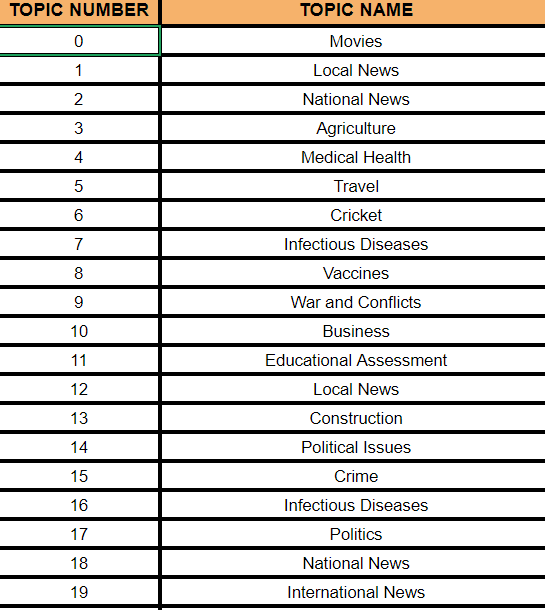

In [ ]:
df.to_csv("Final.csv",index = False, header=True)